In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron


In [2]:
def target_df(num):

  if num == 3:

    return pd.read_csv('/content/drive/MyDrive/CPSC_8420_Project/Attribute_Binary_Datasets/FandT.csv')

  elif num == 1:

    return pd.read_csv('/content/drive/MyDrive/CPSC_8420_Project/Attribute_Binary_Datasets/IandE.csv')

  elif num == 2:

    return pd.read_csv('/content/drive/MyDrive/CPSC_8420_Project/Attribute_Binary_Datasets/NandS.csv')

  else:

    return pd.read_csv('/content/drive/MyDrive/CPSC_8420_Project/Attribute_Binary_Datasets/PandJ.csv')

In [3]:
def train_test_df(df, n, seed, num):

  y = pd.DataFrame()

  y = df['binary']

  X = df.drop(columns=['idx', 'binary', 'type'])

  if num == 1:

    X = X.drop(columns=['first'])

  elif num == 2:

    X = X.drop(columns = ['second'])

  elif num == 3:

    X = X.drop(columns = ['third'])

  else:

    X = X.drop(columns = ['fourth'])

  y.to_numpy()

  X.to_numpy()

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = n, random_state = seed, stratify = y)

  return (X_train, X_test, y_train, y_test)





In [4]:
def running_model(arr_tuple, model_num):

  if model_num == 1:

    clf = svm.LinearSVC()

    clf.fit(arr_tuple[0], arr_tuple[2])

    return accuracy_score(arr_tuple[3], clf.predict(arr_tuple[1]))

  elif model_num == 2:

    clf = LogisticRegression().fit(arr_tuple[0], arr_tuple[2])

    return accuracy_score(arr_tuple[3], clf.predict(arr_tuple[1]))

  else:

    clf = Perceptron().fit(arr_tuple[0], arr_tuple[2])

    return accuracy_score(arr_tuple[3], clf.predict(arr_tuple[1]))



In [5]:
df1 = target_df(1)
df2 = target_df(2)
df3 = target_df(3)
df4 = target_df(4)

In [52]:
df1_tuple = train_test_df(df1, 10, 1990, 1)
df2_tuple = train_test_df(df2, 10, 1990, 2)
df3_tuple = train_test_df(df3, 10, 1990, 3)
df4_tuple = train_test_df(df4, 10, 1990, 4)

In [53]:
score1 = running_model(df1_tuple, 1)
score2 = running_model(df2_tuple, 1)
score3 = running_model(df3_tuple, 1)
score4 = running_model(df4_tuple, 1)

In [54]:
print(score1)
print(score2)
print(score3)
print(score4)

0.7707070707070707
0.8627705627705627
0.5007215007215007
0.602020202020202


In [55]:
def plot_wrt_trainSize(df1, df2, df3, df4, seed):

  arr1 = np.empty([10,2])
  arr2 = np.empty([10,2])
  arr3 = np.empty([10,2])
  arr4 = np.empty([10,2])
  n_size = np.empty([10,1])

  n_size = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

  arr1[:,0] = n_size
  arr2[:,0] = n_size
  arr3[:,0] = n_size
  arr4[:,0] = n_size

  i = 1
  j = 0

  fig, axs = plt.subplots(3)

  while i<=3:

    j = 0

    while j<=9:

      df1_tuple = train_test_df(df1, n_size[j], seed, 1)
      df2_tuple = train_test_df(df2, n_size[j], seed, 2)
      df3_tuple = train_test_df(df3, n_size[j], seed, 3)
      df4_tuple = train_test_df(df4, n_size[j], seed, 4)

      arr1[j,1] = running_model(df1_tuple, i)
      arr2[j,1] = running_model(df2_tuple, i)
      arr3[j,1] = running_model(df3_tuple, i)
      arr4[j,1] = running_model(df4_tuple, i)

      j = j + 1

    axs[i-1].plot(arr1[:,0], arr1[:,1], 'r')
    axs[i-1].plot(arr2[:,0], arr2[:,1], 'g')
    axs[i-1].plot(arr3[:,0], arr3[:,1], 'b')
    axs[i-1].plot(arr4[:,0], arr4[:,1], 'k')

    i = i + 1




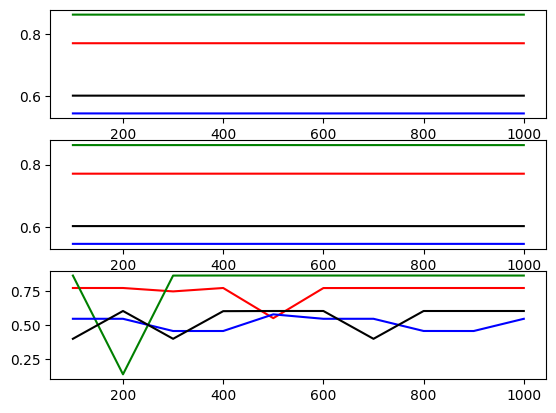

In [56]:
plot_wrt_trainSize(df1, df2, df3, df4, 1000)